In [47]:
import pandas as pd
import os

In [48]:
def removeUnamed(df):
    columnList = df.columns.tolist()
    newColumnList = columnList.copy()
    i = 0
    while i<len(newColumnList):
        if "Unnamed" in newColumnList[i]:
            stats = newColumnList[i-1].split(" / ")
            newColumnList[i-1] = stats[0]
            newColumnList[i] = " ".join(stats)
        i+=1
    columnsRenamed = dict(zip(columnList,newColumnList))
    df = df.rename(columns=columnsRenamed)
    return df

In [49]:
files = os.listdir("PlayersData/UCSD")
playersData = pd.read_excel("PlayersData/UCSD/"+files[0])
playersData = removeUnamed(playersData)
playersData = playersData.assign(Player = files[0].split(".")[0])
for file in files:
    df = pd.read_excel('PlayersData/UCSD/'+file)
    df = removeUnamed(df)
    df = df.assign(Player = " ".join(file.split(" ")[2:]).replace(".xlsx",""))
    playersData = pd.concat([playersData,df])
playersData = playersData[playersData.get("Match").apply(lambda match: "UC San Diego" in match)]
playersData = playersData[playersData.get("Date").apply(lambda date: '2024' in date)]

In [50]:
gameData = pd.read_excel("Team Stats UC San Diego Tritons.xlsx")
gameData = gameData[gameData.get("Team") == "UC San Diego Tritons"].drop("Team",axis = 1)
def removeUnamed(df):
    columnList = df.columns.tolist()
    newColumnList = columnList.copy()
    i = 0
    while i<len(newColumnList):
        if "Unnamed" in newColumnList[i]:
            stats = newColumnList[i-1].split(" / ")
            newColumnList[i-1] = stats[0]
            newColumnList[i] = " ".join(stats)
            newColumnList[i+1] = " ".join(stats) + " percentage"
            
        if "Losses" in newColumnList[i] or "Recoveries" in newColumnList[i]:
            stats = newColumnList[i].split(" / ")
            newColumnList[i] = stats[0]
            newColumnList[i+1] = stats[0] + " "+stats[1]
            newColumnList[i+2] = stats[0] + " "+stats[2]
            newColumnList[i+3] = stats[0] + " "+stats[3]
            i+=3
        i+=1
    columnsRenamed = dict(zip(columnList,newColumnList))
    df = df.rename(columns=columnsRenamed)
    return df
def removePercents(df):
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if "percent" in columns[i]:
            df.drop(columns[i],axis=1,inplace=True)
    return df
gameData = removeUnamed(gameData)
gameData = removePercents(gameData)

In [51]:
gameData

,Date,Match,Competition,Duration,Scheme,Goals,xG,Shots,Shots on target,Passes,...,Smart passes accurate,Throw ins,Throw ins accurate,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
2,2024-09-22,UC San Diego Tritons - Pacific Tigers 0:1,United States. NCAA D1 Non-conference matches (W),96.0,4-4-2 (47.0%),0.0,1.25,14.0,6.0,480.0,...,2.0,36.0,29.0,3.0,14.86,3.43,11.88,19.58,19.34,5.61
4,2024-09-20,UC San Diego Tritons - UC Irvine Anteaters 0:0,United States. NCAA D1 Big West (W),95.0,4-1-4-1 (100.0%),0.0,0.38,10.0,2.0,410.0,...,1.0,29.0,25.0,6.0,11.45,2.99,15.37,25.63,20.19,5.20
6,2024-09-13,San Diego State Aztecs - UC San Diego Tritons 0:1,United States. NCAA D1 Non-conference matches (W),97.0,4-5-1 (100.0%),1.0,1.23,10.0,4.0,410.0,...,0.0,40.0,28.0,9.0,14.84,3.06,11.22,16.73,19.73,6.51
8,2024-09-08,Washington State Cougars - UC San Diego Triton...,United States. NCAA D1 Non-conference matches (W),95.0,4-1-4-1 (100.0%),1.0,0.81,7.0,5.0,342.0,...,0.0,23.0,22.0,19.0,13.46,2.78,13.74,19.42,20.02,8.39
10,2024-09-06,Idaho Vandals - UC San Diego Tritons 2:1,United States. NCAA D1 Non-conference matches (W),95.0,4-2-3-1 (23.45%),1.0,0.75,12.0,4.0,458.0,...,2.0,46.0,34.0,3.0,14.62,3.52,8.52,20.94,18.98,8.73
12,2024-09-02,UC San Diego Tritons - California Baptist Lanc...,United States. NCAA D1 Non-conference matches (W),96.0,4-1-4-1 (100.0%),0.0,0.19,5.0,1.0,417.0,...,1.0,43.0,33.0,5.0,14.42,3.26,12.47,22.84,21.21,15.77
14,2024-08-25,UC San Diego Tritons - Nevada WolfPack 3:0,United States. NCAA D1 Non-conference matches (W),93.0,4-1-4-1 (50.34%),3.0,2.01,14.0,8.0,385.0,...,1.0,27.0,21.0,9.0,14.41,2.98,13.77,18.00,18.47,8.81
16,2024-08-23,UC San Diego Tritons - Pepperdine Waves 0:1,United States. NCAA D1 Non-conference matches (W),93.0,4-1-4-1 (100.0%),0.0,0.66,11.0,2.0,371.0,...,0.0,21.0,20.0,11.0,16.27,3.20,8.89,23.16,18.97,11.33
18,2024-08-19,San Francisco Dons - UC San Diego Tritons 3:0,United States. NCAA D1 Non-conference matches (W),98.0,4-1-4-1 (100.0%),0.0,0.84,5.0,1.0,428.0,...,2.0,35.0,22.0,11.0,13.12,3.15,9.81,15.37,18.60,11.17
20,2024-08-16,Berkeley Golden Bears - UC San Diego Tritons 2:1,United States. NCAA D1 Non-conference matches (W),98.0,4-4-2 (100.0%),1.0,0.52,9.0,4.0,408.0,...,0.0,38.0,29.0,11.0,15.10,3.02,12.99,20.16,21.01,31.40


In [52]:
seasonSum = playersData.drop(["Match","Competition","Date","Position"],axis = 1).groupby("Player").sum().reset_index()
dfs = [playersData, seasonSum]
for df in dfs:
    df.insert(6,"Shot accuracy",df.get("Shots on target")/df.get("Shots"))
    df.insert(6,"Pass accuracy",df.get("Passes accurate")/df.get("Passes"))
    df.insert(6,"Long pass accuracy",df.get("Long passes accurate")/df.get("Long passes"))
    df.insert(6,"Crosses accuracy",df.get("Crosses accurate")/df.get("Crosses"))
    df.insert(6,"Dribbles accuracy",df.get("Dribbles successful")/df.get("Dribbles"))
    df.insert(6,"Duels accuracy",df.get("Duels won")/df.get("Duels"))
    df.insert(6,"Aerial duels accuracy",df.get("Aerial duels won")/df.get("Aerial duels"))
    df.insert(6,"Defensive duels accuracy",df.get("Defensive duels won")/df.get("Defensive duels"))
    df.insert(6,"Loose ball duels accuracy",df.get("Loose ball duels won")/df.get("Loose ball duels"))
    df.insert(6,"Sliding tackles accuracy",df.get("Sliding tackles successful")/df.get("Sliding tackles"))
    df.insert(6,"Offensive duels accuracy",df.get("Offensive duels won")/df.get("Offensive duels"))
    df.insert(6,"Through pass accuracy",df.get("Through passes accurate")/df.get("Through passes"))
    df.insert(6,"Passes to final third accuracy",df.get("Passes to final third accurate")/df.get("Passes to final third"))
    df.insert(6,"Passes to penalty area accuracy",df.get("Passes to penalty area accurate")/df.get("Passes to penalty area"))
    df.insert(6,"Forward passes accuracy",df.get("Forward passes accurate")/df.get("Forward passes"))
    df.insert(6,"Back passes accuracy",df.get("Back passes accurate")/df.get("Back passes"))
    df.insert(6, "Forward passes percentage",df.get("Forward passes")/df.get("Passes") )
    df.insert(6, "Back passes percentage",df.get("Back passes")/df.get("Passes") )
    df.insert(6, "Passes to final third percentage",df.get("Passes to final third")/df.get("Passes") )
    df.insert(6, "Long passes percentage",df.get("Long passes")/df.get("Passes") )

In [53]:
playerTeamStats = ['Shots', 'Shots on target', 'xG', 'Passes','Passes accurate', 'Long passes', 'Long passes accurate', 'Crosses','Crosses accurate','Duels',
                   'Duels won', 'Aerial duels', 'Aerial duels won', 'Interceptions','Losses','Recoveries','Defensive duels', 'Defensive duels won','Offensive duels', 
                   'Offensive duels won','Touches in penalty area', 'Offsides','Passes to final third','Passes to final third accurate','Forward passes','Forward passes accurate', 'Back passes', 'Back passes accurate']
seasonSum = seasonSum.set_index("Player")
for stat in playerTeamStats:
    statsCol = []
    for rowNum in range(playersData.shape[0]):
        row = playersData.iloc[rowNum]
        teamStat = gameData[gameData.get("Match")==row.get("Match")].get(stat).iloc[0]
        playerStat = row.get(stat)
        statsCol.append(playerStat/teamStat)
    playersData.insert(6,stat+" percentage of team",statsCol)
# first = ["Player"]+playersData.columns.tolist()[:5]
# second = sorted(playersData.columns.tolist()[5:-1])
# playersData = playersData.get(first+second)
# first = playersData.columns.tolist()[:6]
# second = sorted(playersData.columns.tolist()[6:])
# playersData = playersData.get(first+second)
# first = ["Position","Minutes played"]
# second = sorted(seasonSum.columns.tolist()[1:-1])
# seasonSum = seasonSum.get(first+second)

C:\Users\zcoch\AppData\Local\Temp\ipykernel_32592\1854189505.py:11: RuntimeWarning: invalid value encountered in scalar divide
  statsCol.append(playerStat/teamStat)


In [54]:
seasonSum

,Minutes played,Total actions,Total actions successful,Goals,Assists,Long passes percentage,Passes to final third percentage,Back passes percentage,Forward passes percentage,Back passes accuracy,...,xCG,Shots against,Saves,Saves with reflexes,Exits,Passes to GK,Passes to GK accurate,Goal kicks,Short goal kicks,Long goal kicks
Player,,,,,,,,,,,,,,,,,,,,,
A. Medrano,8,11,4,0,0,0.000000,0.000000,0.500000,0.000000,1.000000,...,0.00,0,0,0,0,0,0,0,0,0
A. Guillen,136,98,50,0,0,0.046512,0.093023,0.418605,0.162791,1.000000,...,0.00,0,0,0,0,0,0,0,0,0
A. Luo,954,830,541,0,0,0.105368,0.141153,0.166998,0.457256,0.940476,...,0.00,0,0,0,0,4,4,0,0,0
A. Nguyen,363,244,109,0,0,0.037736,0.160377,0.122642,0.264151,0.692308,...,0.00,0,0,0,0,0,0,0,0,0
A. Reed,89,48,22,0,0,0.058824,0.176471,0.470588,0.294118,0.875000,...,0.00,0,0,0,0,0,0,0,0,0
B. Barretto,433,153,115,0,0,0.339806,0.029126,0.000000,0.475728,NaN,...,2.46,17,14,8,4,0,0,31,22,9
C. Borg,864,658,489,0,0,0.077754,0.045356,0.049676,0.367171,0.913043,...,0.00,0,0,0,0,12,12,0,0,0
C. Hilliard,787,442,248,2,3,0.074561,0.070175,0.289474,0.210526,0.818182,...,0.00,0,0,0,0,0,0,0,0,0
E. Fitzgerald,45,26,9,0,0,0.000000,0.166667,0.166667,0.166667,1.000000,...,0.00,0,0,0,0,0,0,0,0,0


In [55]:
playersData

,Match,Competition,Date,Position,Minutes played,Total actions,Back passes accurate percentage of team,Back passes percentage of team,Forward passes accurate percentage of team,Forward passes percentage of team,...,Shots against,Saves,Saves with reflexes,Exits,Passes to GK,Passes to GK accurate,Goal kicks,Short goal kicks,Long goal kicks,Player
0,San Francisco Dons - UC San Diego Tritons 3:0,United States. NCAA D1 Non-conference matches (W),2024-08-19,0,8,11,0.034483,0.028571,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,Player stats A
0,San Francisco Dons - UC San Diego Tritons 3:0,United States. NCAA D1 Non-conference matches (W),2024-08-19,0,8,11,0.034483,0.028571,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,A. Medrano
0,UC San Diego Tritons - UC Irvine Anteaters 0:0,United States. NCAA D1 Big West (W),2024-09-20,0,7,3,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,A. Guillen
1,San Diego State Aztecs - UC San Diego Tritons 0:1,United States. NCAA D1 Non-conference matches (W),2024-09-13,0,23,15,0.060606,0.060606,0.000000,0.006211,...,0,0,0,0,0,0,0,0,0,A. Guillen
2,Washington State Cougars - UC San Diego Triton...,United States. NCAA D1 Non-conference matches (W),2024-09-08,0,21,15,0.046512,0.040816,0.010101,0.006494,...,0,0,0,0,0,0,0,0,0,A. Guillen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,UC San Diego Tritons - California Baptist Lanc...,United States. NCAA D1 Non-conference matches (W),2024-09-02,RCB,88,74,0.095238,0.082192,0.148148,0.174242,...,0,0,0,0,5,5,0,0,0,T. Lin
6,UC San Diego Tritons - Nevada WolfPack 3:0,United States. NCAA D1 Non-conference matches (W),2024-08-25,RCB,94,66,0.036364,0.034483,0.166667,0.147887,...,0,0,0,0,2,2,0,0,0,T. Lin
7,UC San Diego Tritons - Pepperdine Waves 0:1,United States. NCAA D1 Non-conference matches (W),2024-08-23,RCB,94,72,0.031250,0.029412,0.200000,0.172662,...,0,0,0,0,1,1,0,0,0,T. Lin
8,San Francisco Dons - UC San Diego Tritons 3:0,United States. NCAA D1 Non-conference matches (W),2024-08-19,RCB,98,93,0.068966,0.071429,0.229885,0.212766,...,0,0,0,0,0,0,0,0,0,T. Lin


In [89]:
seasonData = pd.read_csv("SeasonDataAllTeams.csv")
seasonData = seasonData[seasonData.get("Season")==2024]
seasonData = seasonData[seasonData.get("Team").apply(lambda team: team in ['CSU Bakersfield Roadrunners',
 'UC Davis Aggies',
 'Cal Poly Mustangs',
 'Cal State Fullerton Titans',
 'CSUN Matadors',
 'University of Hawaii',
 'Long Beach State University',
 'UC San Diego Tritons',
 'UC Riverside Highlanders',
 'UC Irvine Anteaters',
 'UC Santa Barbara Gauchos'])]
seasonData.set_index("Team",inplace=True)
seasonData.drop(["Unnamed: 0"],axis = 1,inplace=True)
seasonData.get(["Forward passes accuracy_y","Forward passes"]).sort_values("Forward passes accuracy_y",ascending=False)

,Forward passes accuracy_y,Forward passes
Team,,
Cal Poly Mustangs,0.670697,175.750000
UC Santa Barbara Gauchos,0.652903,172.222222
Cal State Fullerton Titans,0.621053,130.625000
UC San Diego Tritons,0.619694,147.250000
Long Beach State University,0.617043,139.142857
UC Riverside Highlanders,0.616798,152.400000
UC Irvine Anteaters,0.598552,155.375000
University of Hawaii,0.571542,140.555556
UC Davis Aggies,0.570076,132.000000


In [130]:
seasonData.get(["Passes accuracy_y","Passes"]).sort_values("Passes accuracy_y",ascending=False)

,Passes accuracy_y,Passes
Team,,
UC Santa Barbara Gauchos,0.792097,506.111111
Cal Poly Mustangs,0.774024,499.500000
UC Riverside Highlanders,0.757791,365.800000
UC San Diego Tritons,0.745573,402.375000
Long Beach State University,0.738866,352.857143
UC Irvine Anteaters,0.729656,414.750000
Cal State Fullerton Titans,0.694103,305.250000
UC Davis Aggies,0.680371,310.125000
University of Hawaii,0.670895,315.333333


In [90]:
seasonData.get(["Defensive duels accuracy_y", "Defensive duels"]).sort_values("Defensive duels accuracy_y",ascending=False)

,Defensive duels accuracy_y,Defensive duels
Team,,
UC Irvine Anteaters,0.752809,100.125000
UC San Diego Tritons,0.709330,104.500000
University of Hawaii,0.708861,105.333333
UC Santa Barbara Gauchos,0.700399,83.444444
Long Beach State University,0.692602,112.000000
Cal Poly Mustangs,0.687875,104.125000
CSUN Matadors,0.687296,115.125000
UC Davis Aggies,0.684499,91.125000
UC Riverside Highlanders,0.673640,95.600000


In [119]:
seasonData.get(["Aerial duels accuracy_y", "Defensive duels"]).sort_values("Aerial duels accuracy_y",ascending=False)

,Aerial duels accuracy_y,Defensive duels
Team,,
UC Santa Barbara Gauchos,0.506289,83.444444
UC Riverside Highlanders,0.494845,95.600000
UC Davis Aggies,0.479100,91.125000
University of Hawaii,0.451389,105.333333
Cal Poly Mustangs,0.443515,104.125000
UC Irvine Anteaters,0.442953,100.125000
CSU Bakersfield Roadrunners,0.441011,124.111111
Cal State Fullerton Titans,0.415789,102.000000
UC San Diego Tritons,0.414634,104.500000


In [91]:
seasonData.get(["Offensive duels accuracy_y", "Offensive duels"]).sort_values("Offensive duels accuracy_y",ascending=False)

,Offensive duels accuracy_y,Offensive duels
Team,,
Long Beach State University,0.356406,97.000000
Cal State Fullerton Titans,0.342649,102.875000
UC Davis Aggies,0.337261,84.875000
Cal Poly Mustangs,0.328012,86.125000
UC Santa Barbara Gauchos,0.325554,95.222222
UC Riverside Highlanders,0.319512,82.000000
UC San Diego Tritons,0.315868,83.500000
CSUN Matadors,0.307571,79.250000
CSU Bakersfield Roadrunners,0.304054,82.222222


In [151]:
seasonData.get(["Forward passes percentage_y"]).sort_values("Forward passes percentage_y",ascending=False)

,Forward passes percentage_y
Team,
Cal State Fullerton Titans,0.382891
University of Hawaii,0.379727
CSUN Matadors,0.377328
CSU Bakersfield Roadrunners,0.366589
UC Davis Aggies,0.356635
UC Riverside Highlanders,0.339105
Long Beach State University,0.329315
UC Irvine Anteaters,0.307311
Cal Poly Mustangs,0.304882


In [81]:
seasonSum.get(["Forward passes accuracy","Forward passes"]).sort_values("Forward passes accuracy",ascending=False)

,Forward passes accuracy,Forward passes
Player,,
B. Barretto,0.795918,49
C. Borg,0.752941,170
K. Madero,0.705882,17
K. Harris,0.700000,50
G. Fronk,0.687500,48
L. Raad,0.657754,187
S. Enge,0.653543,127
A. Nguyen,0.607143,28
T. Lin,0.592742,248


In [82]:
seasonSum.get(["Defensive duels accuracy", "Defensive duels"]).sort_values("Defensive duels accuracy",ascending=False)

,Defensive duels accuracy,Defensive duels
Player,,
N. Abel,1.000000,4
A. Reed,0.888889,9
E. Trevino,0.863636,22
C. Hilliard,0.839286,56
L. Gilligan,0.809524,63
C. Borg,0.795918,49
K. Park,0.754545,110
A. Luo,0.741497,147
A. Nguyen,0.722222,36


In [83]:
seasonSum.get(["Offensive duels accuracy", "Offensive duels"]).sort_values("Offensive duels accuracy",ascending=False)

,Offensive duels accuracy,Offensive duels
Player,,
L. Granger,1.000000,3
J. Rivera,0.666667,3
L. Raad,0.571429,42
K. Madero,0.555556,9
C. Borg,0.516129,31
A. Luo,0.500000,54
L. Park,0.426829,82
C. Hilliard,0.404762,84
T. Lin,0.400000,10


In [132]:
seasonSum.get(["Forward passes percentage"]).sort_values("Forward passes percentage",ascending=False)

,Forward passes percentage
Player,
L. Granger,0.576923
K. Harris,0.495050
L. Raad,0.494709
T. Lin,0.480620
B. Barretto,0.475728
A. Luo,0.457256
G. Fronk,0.432432
C. Borg,0.367171
L. Park,0.360360


In [108]:
playersData.columns.tolist()

['Match',
 'Competition',
 'Date',
 'Position',
 'Minutes played',
 'Total actions',
 'Back passes accurate percentage of team',
 'Back passes percentage of team',
 'Forward passes accurate percentage of team',
 'Forward passes percentage of team',
 'Passes to final third accurate percentage of team',
 'Passes to final third percentage of team',
 'Offsides percentage of team',
 'Touches in penalty area percentage of team',
 'Offensive duels won percentage of team',
 'Offensive duels percentage of team',
 'Defensive duels won percentage of team',
 'Defensive duels percentage of team',
 'Recoveries percentage of team',
 'Losses percentage of team',
 'Interceptions percentage of team',
 'Aerial duels won percentage of team',
 'Aerial duels percentage of team',
 'Duels won percentage of team',
 'Duels percentage of team',
 'Crosses accurate percentage of team',
 'Crosses percentage of team',
 'Long passes accurate percentage of team',
 'Long passes percentage of team',
 'Passes accurate pe

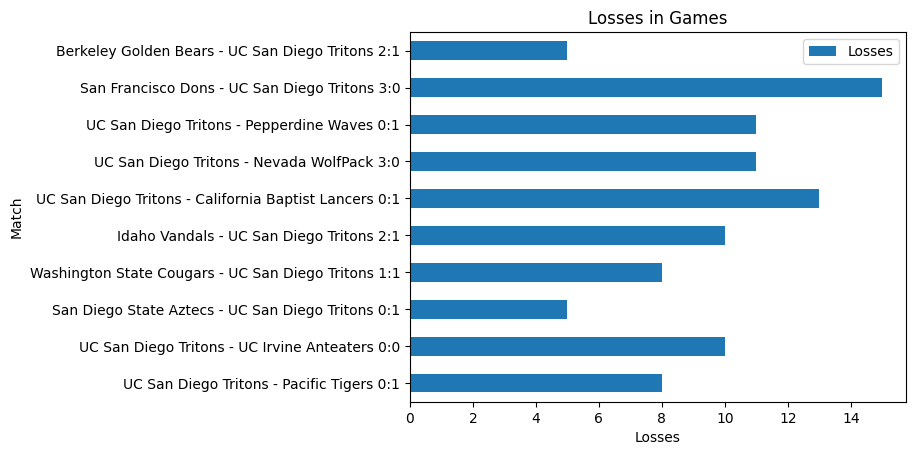

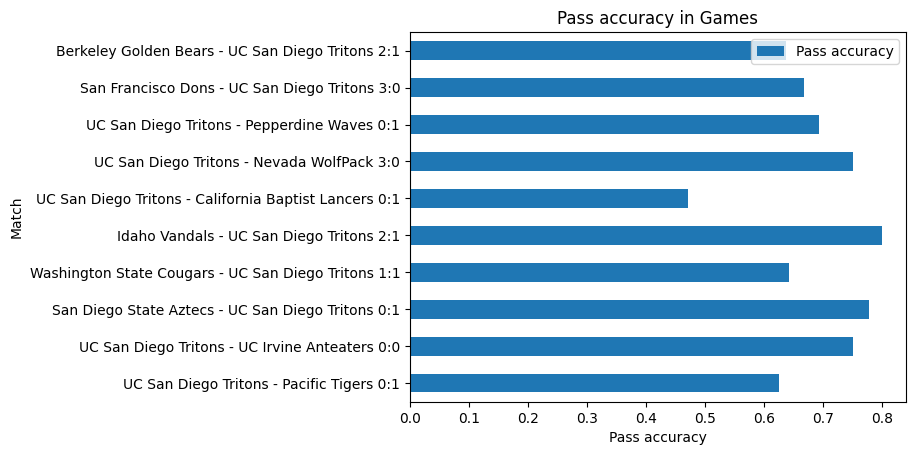

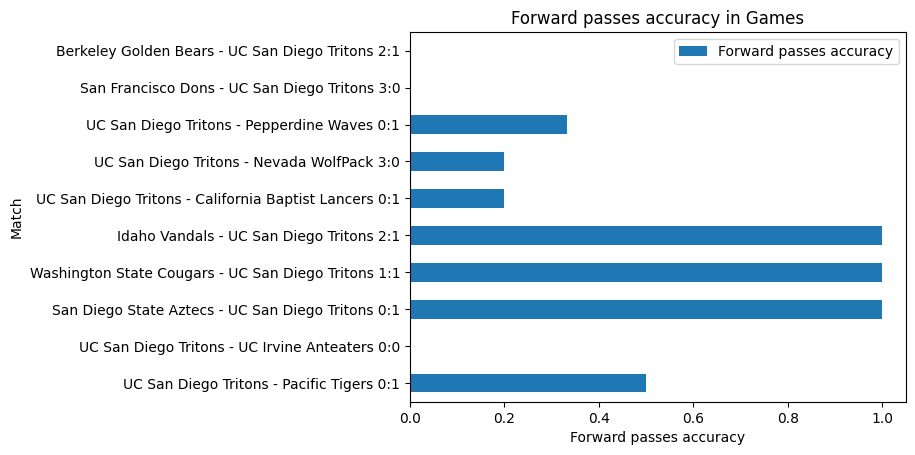

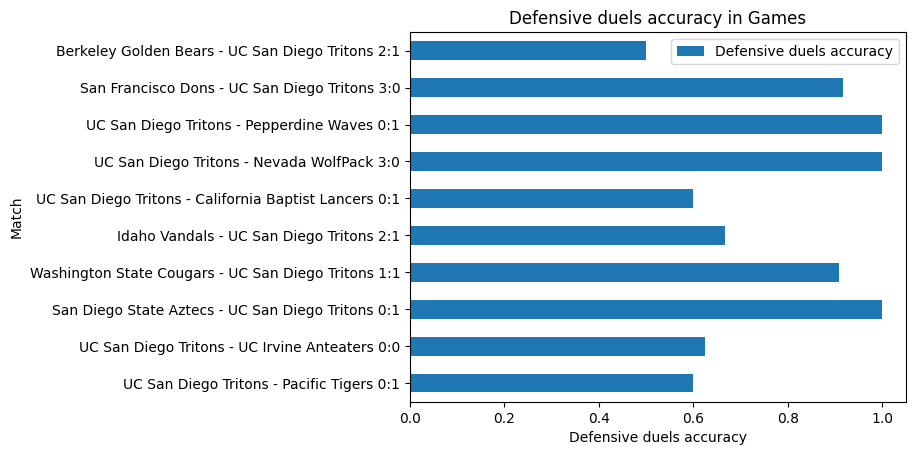

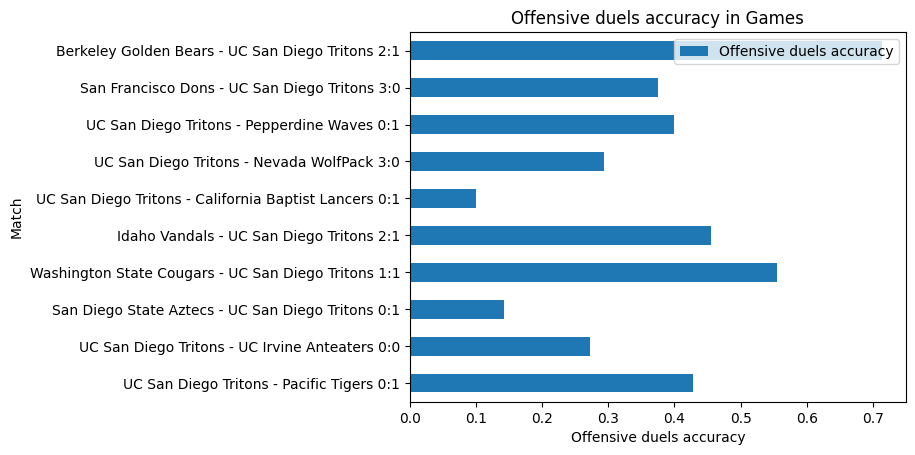

In [154]:
player = "L. Gilligan"
stats = ["Losses","Pass accuracy","Forward passes accuracy","Defensive duels accuracy","Offensive duels accuracy",]
for stat in stats:
    playerSpecific = playersData[playersData.get("Player")==player]
    playerSpecific = playerSpecific.get([stat, "Match"])
    playerSpecific.plot(kind = "barh",x="Match",xlabel=stat,title=stat+" in Games")
